In [9]:
import os
import numpy as np
from sklearn.cluster import DBSCAN

# Constants
EPS = 0.5  # DBSCAN epsilon parameter
MIN_SAMPLES = 5  # DBSCAN minimum samples parameter
GRID_SIZE = 50  # Grid size for the image

def load_image(image_path):
    # Load and preprocess the image
    # Return the preprocessed image array
    # You can use libraries like OpenCV or PIL to load and preprocess the image
    pass

def extract_features(image):
    # Extract relevant features from the image
    # For brain tumor detection, you might consider using intensity-based features,
    # such as pixel intensity or texture features like Haralick features
    pass

def preprocess_images(data_dir):
    # Preprocess all images in the given directory
    # Return a list of preprocessed images
    images = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(data_dir, filename)
            image = load_image(image_path)
            images.append(image)
    return images

def create_feature_matrix(images):
    # Create a feature matrix from a list of preprocessed images
    features = []
    for image in images:
        feature = extract_features(image)
        features.append(feature)
    return np.array(features)

def cluster_tumor_locations(features):
    # Apply DBSCAN clustering to the feature matrix
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
    db.fit(features)
    labels = db.labels_
    return labels

def get_tumor_locations(labels):
    # Identify the tumor locations from the DBSCAN labels
    tumor_locations = []
    for label in set(labels):
        if label != -1:  # Ignore noise points
            cluster_indices = np.where(labels == label)[0]
            tumor_locations.append(cluster_indices)
    return tumor_locations

def convert_indices_to_coordinates(indices):
    # Convert grid indices to actual image coordinates
    coordinates = []
    for index in indices:
        row = index // GRID_SIZE
        col = index % GRID_SIZE
        coordinates.append((row, col))
    return coordinates

# Main code

# Preprocess the images
data_dir = "archive/yes"
images = preprocess_images(data_dir)

# Create the feature matrix
features = create_feature_matrix(images)

# Cluster the tumor locations
labels = cluster_tumor_locations(features)

# Get the tumor locations as grid indices
tumor_locations = get_tumor_locations(labels)

# Convert grid indices to coordinates
tumor_coordinates = []
for tumor_location in tumor_locations:
    coordinates = convert_indices_to_coordinates(tumor_location)
    tumor_coordinates.extend(coordinates)

# Print the tumor coordinates
for coordinate in tumor_coordinates:
    print("Tumor location: ({}, {})".format(coordinate[0], coordinate[1]))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
data_dir = "./archive/yes"
images = preprocess_images(data_dir)

In [19]:
len(images)

87

## ---------------------------------------

In [3]:
import numpy as np
import cv2
from sklearn.cluster import DBSCAN

# Constants
EPS = 0.5  # DBSCAN epsilon parameter
MIN_SAMPLES = 5  # DBSCAN minimum samples parameter
GRID_SIZE = 50  # Grid size for the image

def preprocess_image(image_path):
    # Load and preprocess the image
    # Return the preprocessed image array
    image = cv2.imread(image_path, 0)  # Load image in grayscale
    # Preprocess the image (e.g., resize, normalize, enhance contrast, etc.)
    preprocessed_image = cv2.resize(image, (GRID_SIZE, GRID_SIZE))
    return preprocessed_image

def extract_features(image):
    # Extract relevant features from the image
    # For brain tumor detection, you might consider using intensity-based features,
    # such as pixel intensity or texture features like Haralick features
    features = image.flatten()  # Use pixel intensities as features
    return features

def cluster_tumor_locations(features):
    # Apply DBSCAN clustering to the feature matrix
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
    db.fit(features)
    labels = db.labels_
    return labels

def get_tumor_locations(labels):
    # Identify the tumor locations from the DBSCAN labels
    tumor_locations = []
    for label in set(labels):
        if label != -1:  # Ignore noise points
            cluster_indices = np.where(labels == label)[0]
            tumor_locations.append(cluster_indices)
    return tumor_locations

def convert_indices_to_coordinates(indices):
    # Convert grid indices to actual image coordinates
    coordinates = []
    for index in indices:
        row = index // GRID_SIZE
        col = index % GRID_SIZE
        coordinates.append((row, col))
    return coordinates

# Main code

# Preprocess the image
image_path = "archive/yes/Y1.jpg"
preprocessed_image = preprocess_image(image_path)

# Create the feature matrix
features = extract_features(preprocessed_image)

# Reshape the features array to match the expected input shape for DBSCAN
features = np.expand_dims(features, axis=0)

# Cluster the tumor locations
labels = cluster_tumor_locations(features)

# Get the tumor locations as grid indices
tumor_locations = get_tumor_locations(labels)

# Convert grid indices to coordinates
tumor_coordinates = []
for tumor_location in tumor_locations:
    coordinates = convert_indices_to_coordinates(tumor_location)
    tumor_coordinates.extend(coordinates)

# Print the tumor coordinates
for coordinate in tumor_coordinates:
    print("Tumor location: ({}, {})".format(coordinate[0], coordinate[1]))
    

In [18]:
import numpy as np
import cv2
from sklearn.cluster import DBSCAN

# Constants
EPS = 0.5  # DBSCAN epsilon parameter
MIN_SAMPLES = 5  # DBSCAN minimum samples parameter
GRID_SIZE = 50  # Grid size for the image

def preprocess_image(image_path):
    # Load and preprocess the image
    # Return the preprocessed image array
    image = cv2.imread(image_path, 0)  # Load image in grayscale
    # Preprocess the image (e.g., resize, normalize, enhance contrast, etc.)
    preprocessed_image = cv2.resize(image, (GRID_SIZE, GRID_SIZE))
    return preprocessed_image

def extract_features(image):
    # Extract relevant features from the image
    # For brain tumor detection, you might consider using intensity-based features,
    # such as pixel intensity or texture features like Haralick features
    features = image.flatten()  # Use pixel intensities as features
    return features

def cluster_tumor_locations(features):
    # Apply DBSCAN clustering to the feature matrix
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
    db.fit(features)
    labels = db.labels_
    return labels

def get_tumor_locations(labels):
    # Identify the tumor locations from the DBSCAN labels
    tumor_locations = []
    for label in set(labels):
        if label != -1:  # Ignore noise points
            cluster_indices = np.where(labels == label)[0]
            tumor_locations.append(cluster_indices)
    return tumor_locations

def convert_indices_to_coordinates(indices):
    # Convert grid indices to actual image coordinates
    coordinates = []
    for index in indices:
        row = index // GRID_SIZE
        col = index % GRID_SIZE
        coordinates.append((row, col))
    return coordinates

# Main code

# Preprocess the image
image_path = "path/to/brain/image.jpg"
preprocessed_image = preprocess_image(image_path)

# Create the feature matrix
features = extract_features(preprocessed_image)

# Reshape the features array to match the expected input shape for DBSCAN
features = np.expand_dims(features, axis=0)

# Cluster the tumor locations
labels = cluster_tumor_locations(features)

# Get the tumor locations as grid indices
tumor_locations = get_tumor_locations(labels)

# Convert grid indices to coordinates
tumor_coordinates = []
for tumor_location in tumor_locations:
    coordinates = convert_indices_to_coordinates(tumor_location)
    tumor_coordinates.extend(coordinates)

# Print the tumor coordinates
if len(tumor_coordinates) > 0:
    for coordinate in tumor_coordinates:
        print("Tumor location: ({}, {})".format(coordinate[0], coordinate[1]))
else:
    print("No tumor locations found.")


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
!pip uninstall opencv-python


In [ ]:
!pip uninstall opencv-python

In [2]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\sakshi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
print("help")

help


In [ ]:
import cv2

def display_image(image):
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Load the image
image_path = "archive/yes/Y1.jpg"
image = cv2.imread(image_path)

# Display the image
display_image(image)


In [ ]:
image

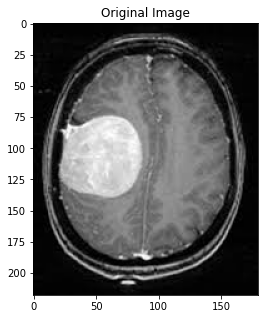

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "archive/yes/Y1.jpg"
image = Image.open(image_path)
image_array = np.array(image)

# Convert the image to grayscale
grayscale_image = image.convert('L')
grayscale_array = np.array(grayscale_image)

# Normalize the grayscale values
normalized_array = grayscale_array / 255.0

# Flatten the image array
flattened_array = normalized_array.flatten()
flattened_points = np.transpose(np.nonzero(flattened_array))

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.imshow(image_array, cmap='gray')
axes.set_title('Original Image')
plt.show()

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
from PIL import Image

# Constants
EPS = 0.5  # DBSCAN epsilon parameter
MIN_SAMPLES = 5  # DBSCAN minimum samples parameter
GRID_SIZE = 50  # Grid size for the image

def preprocess_image(image_path):
    # Load and preprocess the image
    # Return the preprocessed image array
    image = Image.open(image_path).convert("L")  # Open image in grayscale
    # Preprocess the image (e.g., resize, normalize, enhance contrast, etc.)
    preprocessed_image = image.resize((GRID_SIZE, GRID_SIZE))
    return preprocessed_image

def extract_features(image):
    # Extract relevant features from the image
    # For brain tumor detection, you might consider using intensity-based features,
    # such as pixel intensity or texture features like Haralick features
    features = np.array(image).flatten()  # Use pixel intensities as features
    return features

def cluster_tumor_locations(features):
    # Apply DBSCAN clustering to the feature matrix
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
    db.fit(features)
    labels = db.labels_
    return labels

def get_tumor_locations(labels):
    # Identify the tumor locations from the DBSCAN labels
    tumor_locations = []
    for label in set(labels):
        if label != -1:  # Ignore noise points
            cluster_indices = np.where(labels == label)[0]
            tumor_locations.append(cluster_indices)
    return tumor_locations

def convert_indices_to_coordinates(indices):
    # Convert grid indices to actual image coordinates
    coordinates = []
    for index in indices:
        row = index // GRID_SIZE
        col = index % GRID_SIZE
        coordinates.append((row, col))
    return coordinates

# Main code

# Preprocess the image
image_path = "archive/yes/Y1.jpg"
preprocessed_image = preprocess_image(image_path)

# Create the feature matrix
features = extract_features(preprocessed_image)

# Reshape the features array to match the expected input shape for DBSCAN
features = np.expand_dims(features, axis=0)

# Cluster the tumor locations
labels = cluster_tumor_locations(features)

# Get the tumor locations as grid indices
tumor_locations = get_tumor_locations(labels)

# Convert grid indices to coordinates
tumor_coordinates = []
for tumor_location in tumor_locations:
    coordinates = convert_indices_to_coordinates(tumor_location)
    tumor_coordinates.extend(coordinates)

# Print the tumor coordinates
for coordinate in tumor_coordinates:
    print("Tumor location: ({}, {})".format(coordinate[0], coordinate[1]))


In [26]:
image_path = "archive/yes/Y1.jpg"
preprocessed_image = preprocess_image(image_path)

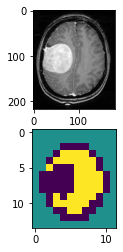

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

img= cv2.imread('archive/yes/Y1.jpg') 
labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

n = 0
while(n<4):
    labimg = cv2.pyrDown(labimg)
    n = n+1

feature_image=np.reshape(labimg, [-1, 3])
rows, cols, chs = labimg.shape

db = DBSCAN(eps=20, min_samples=35, metric = 'euclidean',algorithm ='auto')
db.fit(feature_image)
labels = db.labels_

indices = np.dstack(np.indices(labimg.shape[:2]))
xycolors = np.concatenate((labimg, indices), axis=-1) 
feature_image2 = np.reshape(xycolors, [-1,5])
db.fit(feature_image2)
labels2 = db.labels_

plt.figure(2)
plt.subplot(2, 1, 1)
plt.imshow(img)
#plt.axis('off')

# plt.subplot(2, 1, 2)
# plt.imshow(np.reshape(labels, [rows, cols]))
# plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels2, [rows, cols]))
#plt.axis('off')
plt.show()

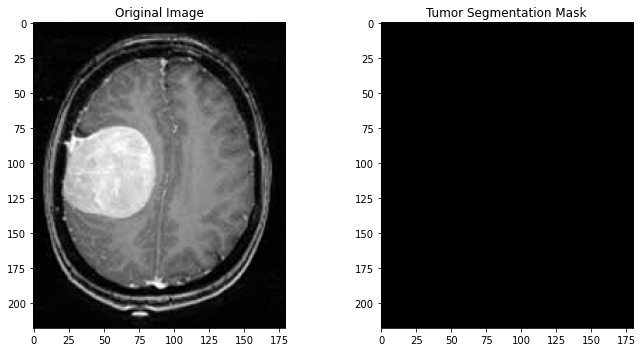

In [76]:
import numpy as np
from sklearn.cluster import DBSCAN
from PIL import Image
import matplotlib.pyplot as plt

def segment_brain_tumor(image_path, epsilon, min_samples, grid_size):
    # Load the MRI image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Convert the image to grayscale
    grayscale_image = image.convert('L')
    grayscale_array = np.array(grayscale_image)

    # Normalize the grayscale values
    normalized_array = grayscale_array / 255.0

    # Define grid dimensions
    height, width = normalized_array.shape
    grid_height = height // grid_size
    grid_width = width // grid_size

    # Perform DBSCAN segmentation for each grid cell
    tumor_points = []
    for i in range(grid_size):
        for j in range(grid_size):
            # Extract the grid cell
            grid_cell = normalized_array[i*grid_height:(i+1)*grid_height, j*grid_width:(j+1)*grid_width]
            flattened_points = np.transpose(np.nonzero(grid_cell))

            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            dbscan.fit(flattened_points)

            # Get the cluster labels
            labels = dbscan.labels_

            # Identify the tumor cluster
            unique_labels = np.unique(labels)
            if len(unique_labels) < 2:
                continue
            tumor_cluster = unique_labels[1]  # Assuming tumor cluster is labeled as 1

            # Extract tumor points in the grid cell
            tumor_points_grid = flattened_points[labels == tumor_cluster]
            tumor_points_grid[:, 0] += i * grid_height
            tumor_points_grid[:, 1] += j * grid_width
            tumor_points.extend(tumor_points_grid)

    # Create a mask image for tumor segmentation
    mask_image = np.zeros_like(normalized_array)
    mask_image[tuple(np.transpose(tumor_points))] = 1

    # Display the original image and the tumor segmentation mask
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_array, cmap='gray')
    axes[0].set_title('Original Image')
    #axes[0].axis('off')
    axes[1].imshow(mask_image, cmap='gray')
    axes[1].set_title('Tumor Segmentation Mask')
    #axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    return mask_image

# Example usage
image_path = 'archive/yes/Y1.jpg'  # Replace with the actual path to the MRI image
epsilon = 10  # Maximum distance between points in the same cluster
min_samples = 100  # Minimum number of points required to form a dense region
grid_size = 5  # Number of grid cells in each dimension

segmented_mask = segment_brain_tumor(image_path, epsilon, min_samples, grid_size)

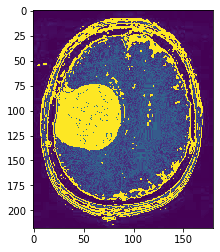

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

img = cv2.imread('archive/yes/Y1.jpg')

Z = np.float32(img.reshape((-1,3)))
db = DBSCAN(eps=0.8, min_samples=100).fit(Z[:,:2])

plt.imshow(np.uint8(db.labels_.reshape(img.shape[:2])))
plt.show()

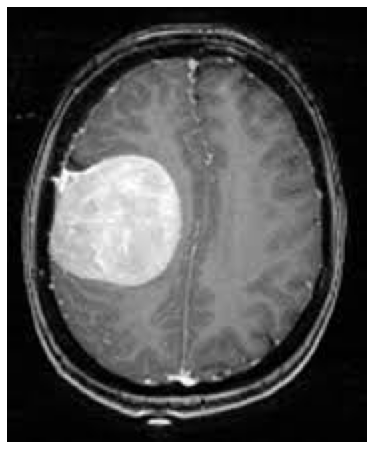

In [85]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from PIL import Image

# Constants
EPS = 0.5  # DBSCAN epsilon parameter
MIN_SAMPLES = 5  # DBSCAN minimum samples parameter
GRID_SIZE = 50  # Grid size for the image

def preprocess_image(image_path):
    # Load and preprocess the image
    # Return the preprocessed image array
    image = Image.open(image_path).convert("L")  # Open image in grayscale
    # Preprocess the image (e.g., resize, normalize, enhance contrast, etc.)
    preprocessed_image = image.resize((GRID_SIZE, GRID_SIZE))
    return preprocessed_image

def extract_features(image):
    # Extract relevant features from the image
    # For brain tumor identification, you might consider using intensity-based features,
    # such as pixel intensity or texture features like Haralick features
    features = np.array(image).flatten()  # Use pixel intensities as features
    return features

def cluster_tumor_locations(features):
    # Apply DBSCAN clustering to the feature matrix
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
    db.fit(features)
    labels = db.labels_
    return labels

def plot_tumor_locations(image, labels):
    # Plot the tumor locations on the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    # Plot tumor locations in red
    for label in set(labels):
        if label != -1:  # Ignore noise points
            tumor_indices = np.where(labels == label)[0]
            x_coords = tumor_indices // GRID_SIZE
            y_coords = tumor_indices % GRID_SIZE
            plt.scatter(y_coords, x_coords, color='red', marker='.')

    plt.axis('off')
    plt.show()

# Main code

# Preprocess the image
image_path = 'archive/yes/Y1.jpg'
preprocessed_image = preprocess_image(image_path)

# Create the feature matrix
features = extract_features(preprocessed_image)

# Reshape the features array to match the expected input shape for DBSCAN
features = np.expand_dims(features, axis=0)

# Cluster the tumor locations
labels = cluster_tumor_locations(features)

# Plot the tumor locations on the original image
image = plt.imread(image_path)
plot_tumor_locations(image, labels)


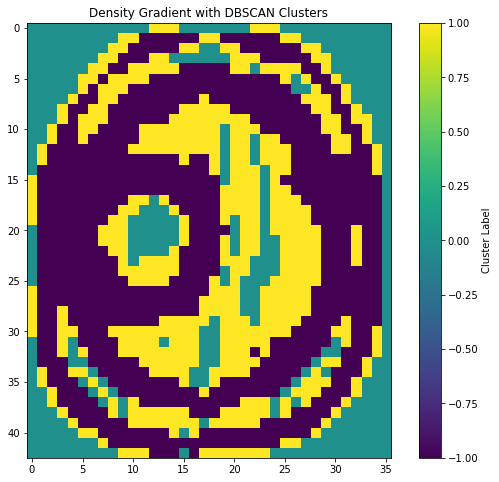

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Constants
EPS = 10  # DBSCAN epsilon parameter
MIN_SAMPLES = 180  # DBSCAN minimum samples parameter
GRID_SIZE = 5  # Grid size for the image

def apply_grid(image, grid_size):
    # Apply a grid to the image
    rows, cols, _ = image.shape
    grid_rows = rows // grid_size
    grid_cols = cols // grid_size
    grid_image = np.zeros((grid_rows, grid_cols))

    for i in range(grid_rows):
        for j in range(grid_cols):
            cell = image[i * grid_size: (i+1) * grid_size, j * grid_size: (j+1) * grid_size]
            cell_average = np.mean(cell)
            grid_image[i, j] = cell_average

    return grid_image

def calculate_density_gradient(image):
    # Calculate the density gradient of an image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

# Load the image
image_path = 'archive/yes/Y1.jpg'
image = cv2.imread(image_path)

# Apply a grid to the image
grid_image = apply_grid(image, GRID_SIZE)

# Calculate the density gradient
gradient_image = calculate_density_gradient(grid_image)

# Reshape the gradient image for visualization
gradient_image = gradient_image.reshape(grid_image.shape)

# Apply DBSCAN clustering
Z = np.float32(gradient_image.reshape((-1, 1)))
db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit(Z)

# Reshape the labels to match the grid size
labels = db.labels_.reshape(grid_image.shape)

# Plot the density gradient with clusters
plt.figure(figsize=(10, 8))
plt.imshow(labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Density Gradient with DBSCAN Clusters')
#plt.axis('off')
plt.show()


In [64]:
gradient_image

array([[ 0.        ,  0.62625   ,  0.5828125 , ...,  1.179375  ,
         0.3953125 ,  0.        ],
       [ 6.7928125 ,  7.53539381,  8.77194832, ...,  5.56204543,
         4.86666355,  4.6290625 ],
       [ 9.6225    , 10.0419246 , 10.15853134, ...,  8.46211136,
         7.73859099,  7.505625  ],
       ...,
       [ 0.3890625 ,  1.11019699,  2.946654  , ...,  3.18263735,
         3.42929778,  3.571875  ],
       [ 2.0178125 ,  2.65163659,  3.55014052, ...,  3.16585465,
         3.45351047,  3.604375  ],
       [ 0.        ,  1.5746875 ,  2.1975    , ...,  0.7353125 ,
         0.305     ,  0.        ]])

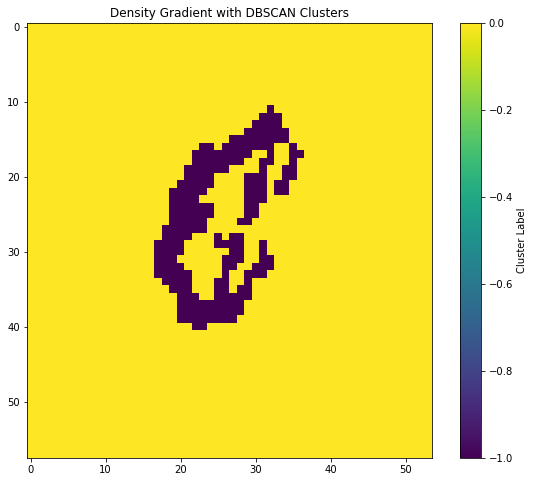

In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Constants
EPS = 10  # DBSCAN epsilon parameter
MIN_SAMPLES = 150  # DBSCAN minimum samples parameter
GRID_SIZE = 4  # Grid size for the image

def apply_grid(image, grid_size):
    # Apply a grid to the image
    rows, cols, _ = image.shape
    grid_rows = rows // grid_size
    grid_cols = cols // grid_size
    grid_image = np.zeros((grid_rows, grid_cols))

    for i in range(grid_rows):
        for j in range(grid_cols):
            cell = image[i * grid_size: (i+1) * grid_size, j * grid_size: (j+1) * grid_size]
            cell_average = np.mean(cell)
            grid_image[i, j] = cell_average

    return grid_image

def calculate_density_gradient(image):
    # Calculate the density gradient of an image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

# Load the image
image_path = 'archive/skin_disease.jpeg'
image = cv2.imread(image_path)

# Apply a grid to the image
grid_image = apply_grid(image, GRID_SIZE)

# Calculate the density gradient
gradient_image = calculate_density_gradient(grid_image)

# Reshape the gradient image for visualization
gradient_image = gradient_image.reshape(grid_image.shape)

# Apply DBSCAN clustering
Z = np.float32(gradient_image.reshape((-1, 1)))
db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit(Z)

# Reshape the labels to match the grid size
labels = db.labels_.reshape(grid_image.shape)

# Plot the density gradient with clusters
plt.figure(figsize=(10, 8))
plt.imshow(labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Density Gradient with DBSCAN Clusters')
#plt.axis('off')
plt.show()


In [72]:
image

array([[[176, 215, 253],
        [178, 216, 251],
        [180, 217, 251],
        ...,
        [ 45,  89, 152],
        [ 48,  92, 155],
        [ 31,  78, 140]],

       [[176, 215, 253],
        [178, 216, 251],
        [182, 217, 251],
        ...,
        [ 45,  89, 152],
        [ 48,  92, 155],
        [ 35,  82, 144]],

       [[178, 216, 251],
        [180, 217, 251],
        [184, 217, 250],
        ...,
        [ 44,  88, 151],
        [ 48,  92, 155],
        [ 41,  88, 150]],

       ...,

       [[208, 215, 234],
        [207, 214, 233],
        [206, 213, 232],
        ...,
        [ 62,  96, 156],
        [ 62,  96, 156],
        [ 62,  96, 156]],

       [[208, 215, 234],
        [207, 214, 233],
        [206, 213, 232],
        ...,
        [ 62,  96, 156],
        [ 62,  96, 156],
        [ 62,  96, 156]],

       [[208, 215, 234],
        [207, 214, 233],
        [206, 213, 232],
        ...,
        [ 62,  96, 156],
        [ 62,  96, 156],
        [ 62,  96, 156]]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("mall_customers.csv")
X = df.iloc[:, [3,4]].values

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# set parameters for DBSCAN
eps = 0.3
min_samples = 5

# fit DBSCAN to the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

# generate clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)


# plot clusters with borders
colors = ["blue", "green", "yellow", "red", "purple", "orange", "pink", "gray", "cyan", "magenta", "black", "brown"]
for i in range(-1, n_clusters):
  mask = (labels == i)
  plt.scatter(X[mask, 0], X[mask, 1], s=20, c=colors[i % len(colors)], label="Cluster {}".format(i))
  if i != -1:
    mask_border = np.logical_and(mask, np.logical_not(np.isin(dbscan.labels_, [i, -1])))
    plt.scatter(X[mask_border, 0], X[mask_border, 1], s=20, c=colors[i % len(colors)])
plt.title("DBSCAN Clustering with Borders")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [ ]:


# define the grid parameters
grid_size = 0.5
min_points = 5

# divide the data space into a grid of cells
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
x_grid = np.arange(x_min, x_max, grid_size)
y_grid = np.arange(y_min, y_max, grid_size)
grid = np.zeros((len(x_grid), len(y_grid)))

# plot the clusters
plt.figure(figsize=(10, 7))
for i in range(len(x_grid)):
    plt.axvline(x=x_grid[i], linestyle='-', color='gray', alpha=0.2)
for j in range(len(y_grid)):
    plt.axhline(y=y_grid[j], linestyle='-', color='gray', alpha=0.2)
density = np.zeros_like(cluster_labels, dtype=np.float64)


cluster_labels = np.zeros((len(X)))
label = 1

for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        # number of data points falling within that cell is computed by counting the number of data points 
        # whose x-coordinates fall within the x-range of the cell and whose y-coordinates fall within the y-range of the cell.
        x_range = (X[:, 0] >= x_grid[i]) & (X[:, 0] < x_grid[i] + grid_size)
        y_range = (X[:, 1] >= y_grid[j]) & (X[:, 1] < y_grid[j] + grid_size)
        grid[i, j] = np.sum(x_range & y_range)
        
        if grid[i, j] >= min_points:            
            x_range = (X[:, 0] >= x_grid[i]) & (X[:, 0] < x_grid[i] + grid_size)
            y_range = (X[:, 1] >= y_grid[j]) & (X[:, 1] < y_grid[j] + grid_size) 
            dbscan = DBSCAN(eps=0.3, min_samples=5)
            # data points that fall within this range are 
            # extracted from the original data using boolean indexing X[x_range & y_range]
            dbscan.fit(X[x_range & y_range]) 
            # to ensure that each cluster is assigned a unique label across all subregions.
            cluster_labels[x_range & y_range] = label + dbscan.labels_
            label += len(np.unique(dbscan.labels_))
            # calculate the density of points in the cell 
            density[x_range & y_range] = np.exp(-dbscan.eps * dbscan.min_samples / X[x_range & y_range].shape[0])


plt.scatter(X[:, 0], X[:, 1], s=10, c=density, cmap='viridis')
plt.colorbar()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Clusters')
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
#df = df.dropna(how='any')           # assign back
df = pd.read_csv("Chicago_crimes.csv")
X = df.loc[:, ['Latitude', 'Longitude']].values
df.dropna(how='any', inplace=True)  # set inplace parameter

In [17]:
X

array([[         nan,          nan],
       [ 41.81722916, -87.63732816],
       [         nan,          nan],
       ...,
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan]])

Number of clusters: 5


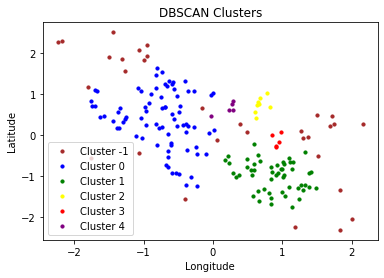

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("Chicago_crimes.csv")

df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)  # set inplace parameter

X = df.loc[:, ['Latitude','Longitude']].values

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# set parameters for DBSCAN
eps = 0.3
min_samples = 5

# fit DBSCAN to the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

# generate clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

# plot clusters with borders
colors = ["blue", "green", "yellow", "red", "purple", "orange", "pink", "gray", "cyan", "magenta", "black", "brown"]
for i in range(-1, n_clusters):
    mask = (labels == i)
    plt.scatter(X[mask, 0], X[mask, 1], s=10, c=colors[i % len(colors)], label="Cluster {}".format(i))
    if i != -1:
        mask_border = np.logical_and(mask, np.logical_not(np.isin(dbscan.labels_, [i, -1])))
        plt.scatter(X[mask_border, 0], X[mask_border, 1], s=10, c=colors[i % len(colors)])
plt.title("DBSCAN Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [20]:
X

array([[-0.16404927,  0.67148559],
       [-1.74122916,  0.71048878],
       [-1.80113368,  1.18072151],
       [-1.26437411,  0.39238015],
       [ 0.49655961, -0.57770843],
       [-1.33203902,  0.65198408],
       [-0.59234681, -0.92314958],
       [ 0.01530347,  0.13110603],
       [-0.64568359, -0.54570387],
       [ 1.0252754 , -0.71123248],
       [-0.48730015, -0.94652551],
       [ 0.05338136, -0.12745167],
       [-0.6504777 ,  0.02429547],
       [-0.736016  ,  0.2011328 ],
       [-1.06880091, -0.43040449],
       [ 1.82989507, -2.32094253],
       [ 0.8364808 , -1.53493693],
       [-0.80797777,  1.63139665],
       [ 0.60000362,  0.57006782],
       [ 1.15062702, -0.6674273 ],
       [-0.73035828,  0.64958185],
       [ 0.16986593, -0.60792238],
       [-0.51582792,  0.944536  ],
       [ 1.27341429, -1.2170344 ],
       [ 0.64666566, -1.37596319],
       [ 1.71155276,  0.46830555],
       [-0.96520326,  0.23817772],
       [-0.63445048,  1.32182038],
       [-1.02881511,

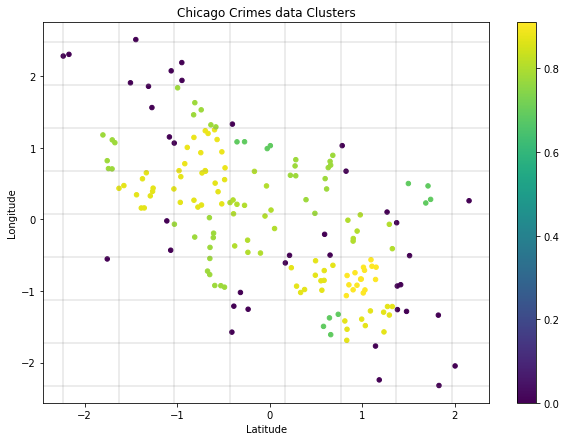

In [48]:
# define the grid parameters
grid_size = 0.6
min_points = 4

# divide the data space into a grid of cells
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
x_grid = np.arange(x_min, x_max, grid_size)
y_grid = np.arange(y_min, y_max, grid_size)
grid = np.zeros((len(x_grid), len(y_grid)))

# plot the grid
plt.figure(figsize=(10, 7))
for i in range(len(x_grid)):
    plt.axvline(x=x_grid[i], linestyle='-', color='gray', alpha=0.2)
for j in range(len(y_grid)):
    plt.axhline(y=y_grid[j], linestyle='-', color='gray', alpha=0.2)

# initialize cluster labels
cluster_labels = np.zeros((len(X)))
label = 1

density = np.zeros_like(cluster_labels, dtype=np.float64)

# apply DBSCAN clustering to each cell with a minimum number of points
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
       
        # number of data points falling within that cell is computed by counting the number of data points
        # whose x-coordinates fall within the x-range of the cell and whose
        # y-coordinates fall within the y-range of the cell.
        x_range = (X[:, 0] >= x_grid[i]) & (X[:, 0] < x_grid[i] + grid_size)
        y_range = (X[:, 1] >= y_grid[j]) & (X[:, 1] < y_grid[j] + grid_size)
       
        # gives the number of data points in the cell
        grid[i, j] = np.sum(x_range & y_range)
       
        # apply dbscan on cell if the cell contains data points more than min_points
        if grid[i, j] >= min_points:
            dbscan = DBSCAN(eps=0.3, min_samples=5)
           
            # data points that fall within the cell's range are
            # extracted from the original data using boolean indexing X[x_range & y_range]
            dbscan.fit(X[x_range & y_range])
           
            # to ensure that each cluster is assigned a unique label across all subregions.
            cluster_labels[x_range & y_range] = label + dbscan.labels_
            label += len(np.unique(dbscan.labels_))
           
            # calculate the density of points in the cell
            density[x_range & y_range] = np.exp(-dbscan.eps * dbscan.min_samples / X[x_range & y_range].shape[0])

# plot variable density clusters
plt.scatter(X[:, 0], X[:, 1], s=20, c=density, cmap='viridis')
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Chicago Crimes data Clusters')
plt.show()

In [22]:
ruh_m = plt.imread('map.png')


In [28]:
BBox = ((df.Longitude.min(),   df.Longitude.max(),    df.Latitude.min(), df.Latitude.max()))

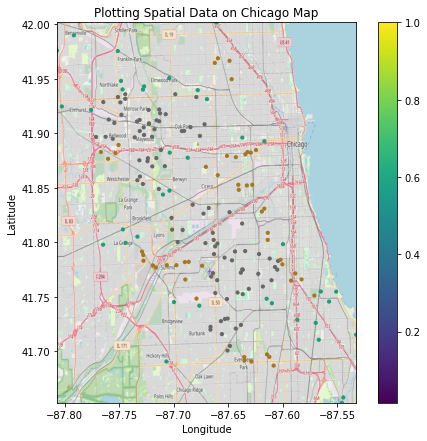

In [47]:
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(df.Longitude, df.Latitude, s=10, c=density, cmap='Dark2')
ax.set_title('Plotting Spatial Data on Chicago Map')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
fig.colorbar(im)

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("Chicago_crimes.csv")

df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)  # set inplace parameter

X = df.loc[:, ['Latitude','Longitude']].values

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[-0.16404927,  0.67148559],
       [-1.74122916,  0.71048878],
       [-1.80113368,  1.18072151],
       [-1.26437411,  0.39238015],
       [ 0.49655961, -0.57770843],
       [-1.33203902,  0.65198408],
       [-0.59234681, -0.92314958],
       [ 0.01530347,  0.13110603],
       [-0.64568359, -0.54570387],
       [ 1.0252754 , -0.71123248],
       [-0.48730015, -0.94652551],
       [ 0.05338136, -0.12745167],
       [-0.6504777 ,  0.02429547],
       [-0.736016  ,  0.2011328 ],
       [-1.06880091, -0.43040449],
       [ 1.82989507, -2.32094253],
       [ 0.8364808 , -1.53493693],
       [-0.80797777,  1.63139665],
       [ 0.60000362,  0.57006782],
       [ 1.15062702, -0.6674273 ],
       [-0.73035828,  0.64958185],
       [ 0.16986593, -0.60792238],
       [-0.51582792,  0.944536  ],
       [ 1.27341429, -1.2170344 ],
       [ 0.64666566, -1.37596319],
       [ 1.71155276,  0.46830555],
       [-0.96520326,  0.23817772],
       [-0.63445048,  1.32182038],
       [-1.02881511,